# **Convolutional Auto Encoders** ✨

onvolutional Autoencoders (CAEs) are deep learning models used for image data processing. They combine the power of convolutional layers (great for images) and autoencoders (great for reducing data dimensions).

💡 How They Work:
1️⃣ Encoder 🧩: Compresses the input image into a smaller representation (latent space) while keeping the most important features.
2️⃣ Decoder 🔄: Reconstructs the original image from the compressed representation, aiming to minimize reconstruction loss.

🎯 Applications:

Image denoising 🖼️✨
Dimensionality reduction 📉
Anomaly detection 🚨
Image compression 📁
They are super useful when working with large image datasets or cleaning noisy images! 🖌️

# **Lets** **start**  🚀

In [31]:
# importing libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from tensorflow.keras.models import Model

#**Loading the data** 📊

In [16]:
(x_train, _), (x_test, _) = mnist.load_data()

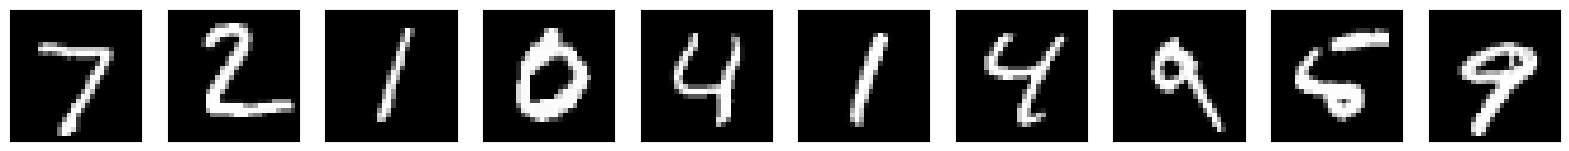

In [17]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(1, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [18]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28*28*1))
x_test = x_test.reshape((len(x_test), 28*28*1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# **Architecture of auto-encoder**  🏗️

In [20]:
input_layer_cnv = Input(shape = (28,28,1))
ae_cnv_en = Conv2D (32, (3,3), activation = "relu", padding = "same", kernel_initializer="he_normal")(input_layer_cnv)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Conv2D (32, (3,3), activation = "relu", padding = "same")(ae_cnv_en)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Conv2D (4, (3,3), activation = "relu", padding = "same")(ae_cnv_en)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Flatten(name = "bot")(ae_cnv_en)

ae_cnv_de = Reshape((4,4,4), input_shape= (64,), name= "botnext0")(ae_cnv_en)
ae_cnv_de = Conv2D (4, (3,3), activation = "relu", padding = "same",name= "botnext1")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2),name= "botnext2")(ae_cnv_de)

ae_cnv_de = Conv2D (32, (3,3), activation = "relu", padding = "same", name= "botnext3")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2), name= "botnext4")(ae_cnv_de)

ae_cnv_de = Conv2D (32, (3,3), activation = "relu", padding = "valid",name= "botnext5")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2), name= "botnext6")(ae_cnv_de)

ae_cnv_de = Conv2D (1, (3,3), activation = "sigmoid", padding = "same",name = "botnext7")(ae_cnv_de)
Ae_Conv = Model(inputs = input_layer_cnv, outputs = ae_cnv_de)

Ae_Conv.compile(optimizer=tf.keras.optimizers.SGD(0.09,clipvalue=2.5), loss='binary_crossentropy', metrics = ["accuracy"])
# Ae_Conv.compile(optimizer=tf.keras.optimizers.Adadelta(0.1,clipvalue=2), loss='binary_crossentropy', metrics = ["accuracy"])
Ae_Conv.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 4)             │           1,156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot (Flatten)                        │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext0 (Reshape)                   │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext1 (Conv2D)                    │ (None, 4, 4, 4)             │             148 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext2 (UpSampling2D)              │ (None, 8, 8, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext3 (Conv2D)                    │ (None, 8, 8, 32)            │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext4 (UpSampling2D)              │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext5 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext6 (UpSampling2D)              │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext7 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,593 (84.35 KB)

 Trainable params: 21,593 (84.35 KB)

 Non-trainable params: 0 (0.00 B)

# **Encoder** 🔐➡️

In [21]:
ae_conv_encoder = Model(inputs = input_layer_cnv, outputs = Ae_Conv.get_layer('bot').output, name ='Conve_AE_encoder')
ae_conv_encoder.summary()

Model: "Conve_AE_encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 4)             │           1,156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot (Flatten)                        │ (None, 64)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,724 (41.89 KB)

 Trainable params: 10,724 (41.89 KB)

 Non-trainable params: 0 (0.00 B)

# **DECODER** 🔓⬅️

In [22]:
encode_inp_cnv = Input(shape= (64,))
tmp_dec = Ae_Conv.get_layer('botnext0')(encode_inp_cnv)
for i in range(1,8):
  st = 'botnext{}'.format(i)
  tmp_dec = Ae_Conv.get_layer(st)(tmp_dec)

ae_conv_decoder = Model(inputs = encode_inp_cnv, outputs = tmp_dec, name= 'Conv_AE_decoder')
ae_conv_decoder.summary()

Model: "Conv_AE_decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext0 (Reshape)                   │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext1 (Conv2D)                    │ (None, 4, 4, 4)             │             148 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext2 (UpSampling2D)              │ (None, 8, 8, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext3 (Conv2D)                    │ (None, 8, 8, 32)            │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext4 (UpSampling2D)              │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext5 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext6 (UpSampling2D)              │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext7 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,869 (42.46 KB)

 Trainable params: 10,869 (42.46 KB)

 Non-trainable params: 0 (0.00 B)

# **Reshapping** **the** **Data**🔄📐

In [23]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# **Training** **the** **Auto encoders** 🏋️‍♂️

In [26]:
from time import time
tic = time()
Ae_Conv.fit(x_train, x_train,
            epochs=100,
            verbose=2,
            batch_size=1024,
            shuffle=False, validation_split= 0.1)
toc = time()
print('training took {} Secs'.format(toc-tic))

Epoch 1/100
53/53 - 14s - 256ms/step - accuracy: 0.7959 - loss: 0.3689 - val_accuracy: 0.7925 - val_loss: 0.2689
Epoch 2/100
53/53 - 9s - 177ms/step - accuracy: 0.7935 - loss: 0.2510 - val_accuracy: 0.8019 - val_loss: 0.2404
Epoch 3/100
53/53 - 2s - 46ms/step - accuracy: 0.7908 - loss: 0.2317 - val_accuracy: 0.8008 - val_loss: 0.2304
Epoch 4/100
53/53 - 1s - 26ms/step - accuracy: 0.7894 - loss: 0.2209 - val_accuracy: 0.8016 - val_loss: 0.2241
Epoch 5/100
53/53 - 3s - 47ms/step - accuracy: 0.7890 - loss: 0.2142 - val_accuracy: 0.8021 - val_loss: 0.2186
Epoch 6/100
53/53 - 1s - 27ms/step - accuracy: 0.7892 - loss: 0.2087 - val_accuracy: 0.8024 - val_loss: 0.2140
Epoch 7/100
53/53 - 1s - 28ms/step - accuracy: 0.7896 - loss: 0.2049 - val_accuracy: 0.8008 - val_loss: 0.2069
Epoch 8/100
53/53 - 1s - 27ms/step - accuracy: 0.7900 - loss: 0.2014 - val_accuracy: 0.7996 - val_loss: 0.2014
Epoch 9/100
53/53 - 1s - 26ms/step - accuracy: 0.7906 - loss: 0.1976 - val_accuracy: 0.8037 - val_loss: 0.205

# **Passing the image to encoder** 🖼️➡️🔐

In [28]:
encoded_imgs = ae_conv_encoder.predict(x_test)
print(encoded_imgs.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 64)


# **Passing Compressed image Features to Decoder**  🖼️

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Recreated image Representation of shape (10000, 28, 28, 1) using Decoder and reduced Image representation of shape (10000, 64)


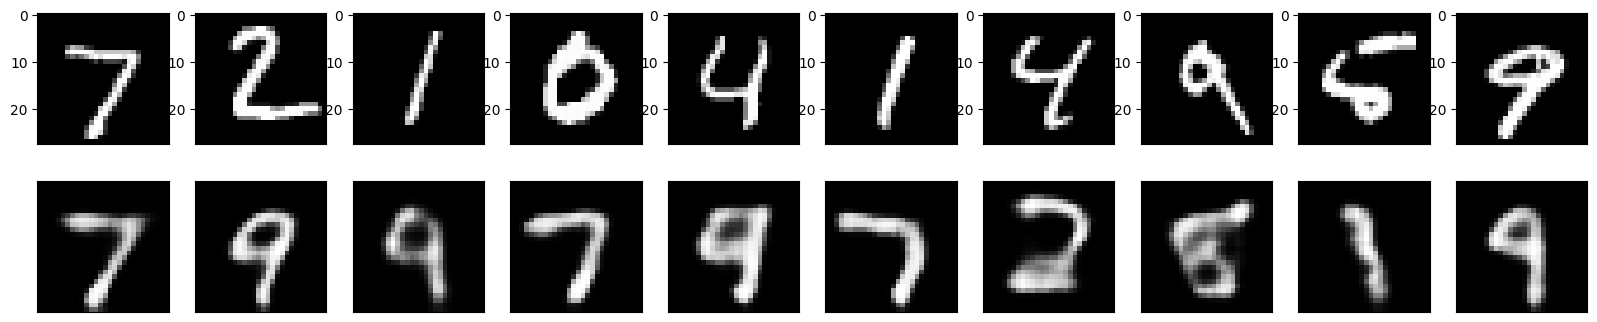

In [30]:
decoded_imgs = ae_conv_decoder.predict(encoded_imgs)
deoceded_images = Ae_Conv.predict(x_test)
print('Recreated image Representation of shape {} using Decoder and reduced Image representation of shape {}'.format (decoded_imgs.shape,
                                                                                                                      encoded_imgs.shape))
n = 10
k = 12
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_xaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i*k].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()